# Comparison of lens curvature measurements 
- Anastasia measured the radius of curvature for the 29 lenses of the right eye. 
    - **NOTE**: The lens was damaged in six ommatidia of specimen 1: C4, D4, D6, D7, E5, E7 (n=23). AM replaced measurements of thickness, curvature, lens, diameter, cone length and width from another specimen. 
- Jing Peng measured radius of curvature for each lens by fitting circles on a prob map from Ilastik px classification.
    - For his first attempt, he accidentally did this on the wrong (Left) eye. All the lenses of the left eye were intact in the EM data (hence n=29).
    - Measurements were performed on the other (right) eye in May 2021. For the right eye, JP excluded the same set of ommatidia as Anastasia, in addition to C6 (hence n=22). JP also measured the minimum distance between the inner surface of the lens and the rhabdom. 
 
1. Compare measurements obtained by Anastasia and Jing Peng
2. Compare optics of the left and right eyes 

In [1]:
import math
import numpy as np
from typing import List
import os.path
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
import statsmodels.api as sm

import sys
sys.path.extend('.', '..')
from cx_analysis.utils import index_by_om
from cx_analysis.dataframe_tools import assemble_cxvectors
from vis.fig_tools import linear_cmap, subtype_cm
from vis.hex_lattice import hexplot_TEST, hexplot

In [2]:
plt.rcdefaults()
#plt.style.use('vis/lamina.mplstyle')
### SAVE FIGS? ###
save_figs=False
##################
# if save_figs:
#     fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/FNAME.svg')
#     fig.savefig('/mnt/home/nchua/Dropbox/lamina_figures/FNAME.png')


In [30]:
am_df = pd.read_excel('~/Data/data for ligh prop.xlsx', index_col=0)
am_df = am_df.iloc[:29] # remove last two lines of excel file
# Add pre-computed rhabdom lengths (from rhabdomere_lengths.ipynb)
rh_len = pd.read_pickle('~/Dropbox/Data/201123_rh_len_df.pickle')
left_cc_len = pd.read_excel('~/Data/210628_lefteye_crystallinecone.xlsx', index_col='Ommatidium', nrows=29).loc[:, 'CC length (2 sig)']
left_cc_len = left_cc_len.rename('Left CC length')
for i, v in rh_len.iterrows():
    am_df.loc[i, 'rhabdom_len'] = float(v)

<ipython-input-30-98a45ced50e3>:1: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  am_df = pd.read_excel('~/Data/data for ligh prop.xlsx', index_col=0)
<ipython-input-30-98a45ced50e3>:5: FutureWarning: Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.
  left_cc_len = pd.read_excel('~/Data/210628_lefteye_crystallinecone.xlsx', index_col='Ommatidium', nrows=29).loc[:, 'CC length (2 sig)']


1     1.436002
2     2.759870
3     1.412395
4     2.774426
5     1.594241
6     1.909158
7     3.196769
8     1.263655
9     1.144456
10    3.443765
11    2.668822
12    3.566577
13    1.426985
14    2.679517
15    2.567312
16    3.100392
17    2.317787
18    2.839586
19    2.729792
20    3.145131
21    2.511139
22    3.402164
23    2.389051
24    2.254077
25    2.567127
26    2.669827
27    3.712231
28    2.776187
29    2.221438
51    1.945934
52    1.048122
53    2.345817
54    2.696429
55    1.726437
56    1.664217
57    1.717645
59    3.630737
60    3.785192
61    3.326454
62    2.822930
63    3.117007
64    5.048415
65    3.170986
66    3.145216
67    3.416385
68    3.348888
69    3.671537
70    2.915753
71    3.280583
72    3.644622
73    3.981179
Name: radii_in, dtype: float64

In [31]:
# Load Jing Peng's measurements for lens interal/external center coords and curvature
with open(os.path.expanduser('~/Data/210521_jp_optics_measurements.json')) as fh:
    jp_data = json.load(fh)
jp_df = pd.DataFrame(jp_data)

# Convert JP's radii of curvature / distances from nm to microns
jp_df[['radii_in', 'radii_out', 'distances']] = jp_df[['radii_in', 'radii_out', 'distances']] / 1000.0
# Compute lens thickness with internal/external center coordinates
dist = lambda p1, p2: np.linalg.norm(p1 - p2)

lens_thickness = [] 
for p1, p2 in zip(jp_df['centers_in'], jp_df['centers_out']):
    lens_thickness.append(dist(np.array(p1), np.array(p2)) / 1000.0)  # nm -> um
jp_df['lens_thickness'] = lens_thickness

display(jp_df['lens_thickness'])

1     1.958977
2     4.050188
3     2.077892
4     4.245302
5     2.025294
6     2.346242
7     4.364703
8     1.814770
9     0.929019
10    4.224526
11    3.500076
12    4.087695
13    1.727541
14    4.176456
15    3.332061
16    3.969363
17    3.285871
18    3.802899
19    2.524333
20    3.886083
21    3.689188
22    4.738650
23    1.696392
24    2.455460
25    2.086297
26    2.346211
27    5.102781
28    3.100927
29    2.806675
51    1.000267
52    1.958112
53    1.739368
54    4.036826
55    2.281621
56    2.116067
57    3.360253
59    4.493954
60    3.303503
61    5.260185
62    4.539210
63    4.516140
64    5.330550
65    4.732377
66    5.333149
67    5.532118
68    4.764852
69    4.989782
70    4.284310
71    4.925465
72    4.978672
73    5.747799
Name: lens_thickness, dtype: float64

In [5]:
### RIGHT EYE ###
right_om_labels = {'A0': 73, 'B0': 72, 
                  'A1': 71, 'B1': 70, 'C1': 69, 
                  'A2': 68, 'B2': 67, 'C2': 66, 'D2': 65, 
                  'A3': 64, 'B3': 63, 'C3': 61, 'D3': 62, 
                  'A4': 60, 'B4': 57, 'E4': 59,  
                  'A5': 56, 'B5': 55, 'C5': 54, 'D5': 53,
                  'B6': 52, 'E6': 51}
# Make sure indices are unique for each om
assert(len(right_om_labels.keys()) == len(set(right_om_labels.values())))

right_inverted = {str(v): k for k, v in right_om_labels.items()}
right_indices = [str(v) for k, v in right_om_labels.items()]
jp_right = jp_df.loc[right_indices]
jp_right = jp_right.rename(index=right_inverted)


# Re-order Anastasia's data to match JP's right eye measurements
# Remove c6 (excluded in JP's measurements)
am_right = am_df.loc[jp_right.index]

In [17]:
### LEFT EYE ###
left_om_labels = {'A0': 12, 'B0': 19, 
             'A1': 11, 'B1': 21, 'C1': 26,
             'A2': 7, 'B2': 17, 'C2': 24, 'D2': 28, 
             'A3': 4, 'B3': 15, 'C3': 23, 'D3': 29, 
             'A4': 2, 'B4': 10, 'C4': 18, 'D4': 25, 'E4': 27, 
             'A5': 1, 'B5': 6, 'C5': 14, 'D5': 20, 'E5': 22, 
             'B6': 3, 'C6': 9, 'D6': 13, 'E6': 16, 
             'D7': 5, 'E7': 8}
# Make sure indices are unique for each om
assert(len(left_om_labels.keys()) == len(set(left_om_labels.values())))

left_inverted = {str(v): k for k, v in left_om_labels.items()}
left_indices = [str(v) for k, v in left_om_labels.items()]
jp_left = jp_df.loc[left_indices]
jp_left = jp_left.rename(index=left_inverted)

cc_left = left_cc_len.loc[jp_left.index]

In [23]:
display(cc_left)
display(jp_left)

A0    5.3
B0    6.4
A1    5.3
B1    6.2
C1    6.3
A2    5.6
B2    5.5
C2    7.5
D2    5.2
A3    4.7
B3    5.0
C3    5.0
D3    5.1
A4    3.7
B4    4.9
C4    5.0
D4    4.5
E4    4.4
A5    2.5
B5    2.5
C5    3.9
D5    4.4
E5    3.9
B6    2.5
C6    2.8
D6    2.1
E6    2.8
D7    2.8
E7    2.7
Name: Left CC length, dtype: float64

,centers_in,centers_out,radii_in,radii_out,distances,lens_thickness
A0,"[47900.28337478257, 53568.17794186512, 86103.0...","[44548.9853258049, 51492.32272144628, 85021.94...",3.566577,3.771656,5.492400,4.087695
B0,"[41680.95576892432, 54273.72398641457, 91135.7...","[40350.8288954058, 52510.39985985725, 89913.56...",2.729792,3.198284,6.287812,2.524333
A1,"[50774.87041153415, 42995.71564846269, 84533.1...","[47518.57213931547, 42228.77531904263, 83504.1...",2.668822,4.100081,5.233458,3.500076
B1,"[45842.73627973367, 46344.10121603297, 91661.7...","[42983.77103379653, 45383.63849228886, 89537.1...",2.511139,4.545368,5.913588,3.689188
C1,"[36940.854724488774, 48768.139406722665, 96051...","[36462.024393466774, 48187.21557442137, 93829....",2.669827,3.133820,5.458147,2.346211
A2,"[53503.78438316623, 33072.35600663852, 82196.8...","[49283.91362530566, 32541.701090379578, 81216....",3.196769,4.372208,5.228981,4.364703
B2,"[47930.10846993528, 35917.090386356525, 89889....","[45326.55510949841, 36026.76125519723, 87887.8...",2.317787,4.077455,5.173796,3.285871
C2,"[41372.08185372788, 40471.496929012, 95102.057...","[40357.70717587446, 40405.225900276186, 92866....",2.254077,3.589200,5.214827,2.455460
D2,"[31419.4166663719, 41736.54605424538, 97673.43...","[31786.744436779976, 41629.14840255549, 94596....",2.776187,3.329732,4.975568,3.100927
A3,"[53267.795220007334, 23196.107428086852, 78140...","[49341.32540772697, 24384.421568839673, 77048....",2.774426,5.038673,4.188894,4.245302


In [7]:
ommatidia = list(left_om_labels)

In [8]:
dra_c = '#434371'
ndra_c = '#C64191'
dra_m = '^'
ndra_m = 'v'

dra_om = ['A4', 'A5', 'B5', 'B6', 'C5', 'C6', 'D6', 'D7', 'E6', 'E7']
ndra_om = [o for o in ommatidia if o not in dra_om]
assert(len(dra_om) + len(ndra_om) == 29)

def om_colors(om_list: List, dra_om: List=dra_om, as_rgb: bool=False, 
              dra_c: str=dra_c, ndra_c: str=ndra_c) -> List:
    
    c_list = []
    for o in om_list:
        if str(o) in dra_om:
            c_list.append(dra_c)
        else:
            c_list.append(ndra_c)
    if as_rgb:
        return [tuple(int(h.lstrip('#')[i:i+2], 16)/255.0 for i in (0, 2, 4)) for h in c_list] 
    else:
        return c_list
    
def om_markers(om_list: List, dra_om: List=dra_om, 
               dra_m: str=dra_m, ndra_m: str=ndra_m) -> List:
    
    m_list = []
    for o in om_list:
        if o in dra_om:
            m_list.append(dra_m)
        else:
            m_list.append(ndra_m)
            
    return m_list

## LEFT VS RIGHT Crystalline cone length

In [9]:
## FOR LEFT RIGHT COMPARISONS, GET RID OF OMMATIDIA EXCLUDED IN RIGHT EYE
left_cc_len_in_r = left_cc_len.loc[am_right.index]

Left variance: 1.8945541022592154
Right variance: 0.5955458331049587


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     cone length (from the tip)   R-squared:                       0.730
Model:                                    OLS   Adj. R-squared:                  0.716
Method:                         Least Squares   F-statistic:                     54.04
Date:                        Thu, 01 Jul 2021   Prob (F-statistic):           4.20e-07
Time:                                16:40:47   Log-Likelihood:                -11.118
No. Observations:                          22   AIC:                             26.24
Df Residuals:                              20   BIC:                             28.42
Df Model:                                   1                                         
Covariance Type:                    nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7003      0.336      5.060      0.000       0.999       2.401
Left CC length     0.5002      0.068      7.351      0.000       0.358       0.642
==============================================================================
Omnibus:                        4.963   Durbin-Watson:                   1.671
Prob(Omnibus):                  0.084   Jarque-Bera (JB):                3.098
Skew:                          -0.879   Prob(JB):                        0.213
Kurtosis:                       3.536   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

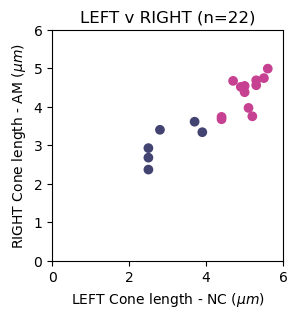

In [42]:
fig, ax = plt.subplots(1, figsize=[3, 3])

x = left_cc_len_in_r
y = am_right.loc[:, 'cone length (from the tip)']
assert(all([i == j for i, j in zip(x.index, y.index)]))
group_c = om_colors(am_right.index)
ax.scatter(x, y, c=group_c)
ax.set_xlim([0.0, 6.0])
ax.set_ylim([0.0, 6.0])
ax.set_xlabel(r"LEFT Cone length - NC ($\mu m$)")
ax.set_ylabel(r"RIGHT Cone length - AM ($\mu m$)")
ax.set_aspect('equal')
ax.set_title(f'LEFT v RIGHT (n={len(x)})')

print(f'Left variance: {left_cc_len.var(ddof=0)}')
print(f'Right variance: {y.var(ddof=0)}')

_x = x
X = sm.add_constant(_x)
Y = y

model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())


In [33]:
def f_thick(r_outer: float, r_inner: float, t: float) -> float:
    # For a bi convex lens, r_inner is negative
    r_inner = -1.0 * r_inner
    
    nl = 1.452 # lens
    nc = 1.348 # cone
    # lens power IN MICROMETERS
    p1 = (nl - 1.0)/r_outer # interface air->lens 
    p2 = (nc - nl)/r_inner # interface lens->cone
    p3 = (t/nl) * p1 * p2
    p = p1 + p2
    #p = p1 + p2 - p3
    
    return 1.0/p


## Correlation of focal length and distance between lens and rhabdom

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     9.935
Date:                Fri, 02 Jul 2021   Prob (F-statistic):            0.00395
Time:                        14:06:51   Log-Likelihood:                -47.103
No. Observations:                  29   AIC:                             98.21
Df Residuals:                      27   BIC:                             100.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4734      0.797      4.360      0.000       1.839       5.108
x1             0.5411      0.172      3.152      0.004       0.189       0.893
==============================================================================
Omnibus:                        3.929   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                1.556
Skew:                          -0.052   Prob(JB):                        0.459
Kurtosis:                       1.870   Cond. No.                         16.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     35.33
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           8.19e-06
Time:                        14:06:51   Log-Likelihood:                -29.013
No. Observations:                  22   AIC:                             62.03
Df Residuals:                      20   BIC:                             64.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179      1.089      0.200      0.843      -2.053       2.489
x1             1.5581      0.262      5.944      0.000       1.011       2.105
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.429
Skew:                          -0.107   Prob(JB):                        0.807
Kurtosis:                       2.351   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     18.56
Date:                Fri, 02 Jul 2021   Prob (F-statistic):           7.90e-05
Time:                        14:06:51   Log-Likelihood:                -85.098
No. Observations:                  51   AIC:                             174.2
Df Residuals:                      49   BIC:                             178.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2808      0.696      4.710      0.000       1.881       4.680
x1             0.6763      0.157      4.308      0.000       0.361       0.992
==============================================================================
Omnibus:                        8.008   Durbin-Watson:                   1.428
Prob(Omnibus):                  0.018   Jarque-Bera (JB):                3.163
Skew:                          -0.297   Prob(JB):                        0.206
Kurtosis:                       1.935   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

NameError: name 'C4' is not defined

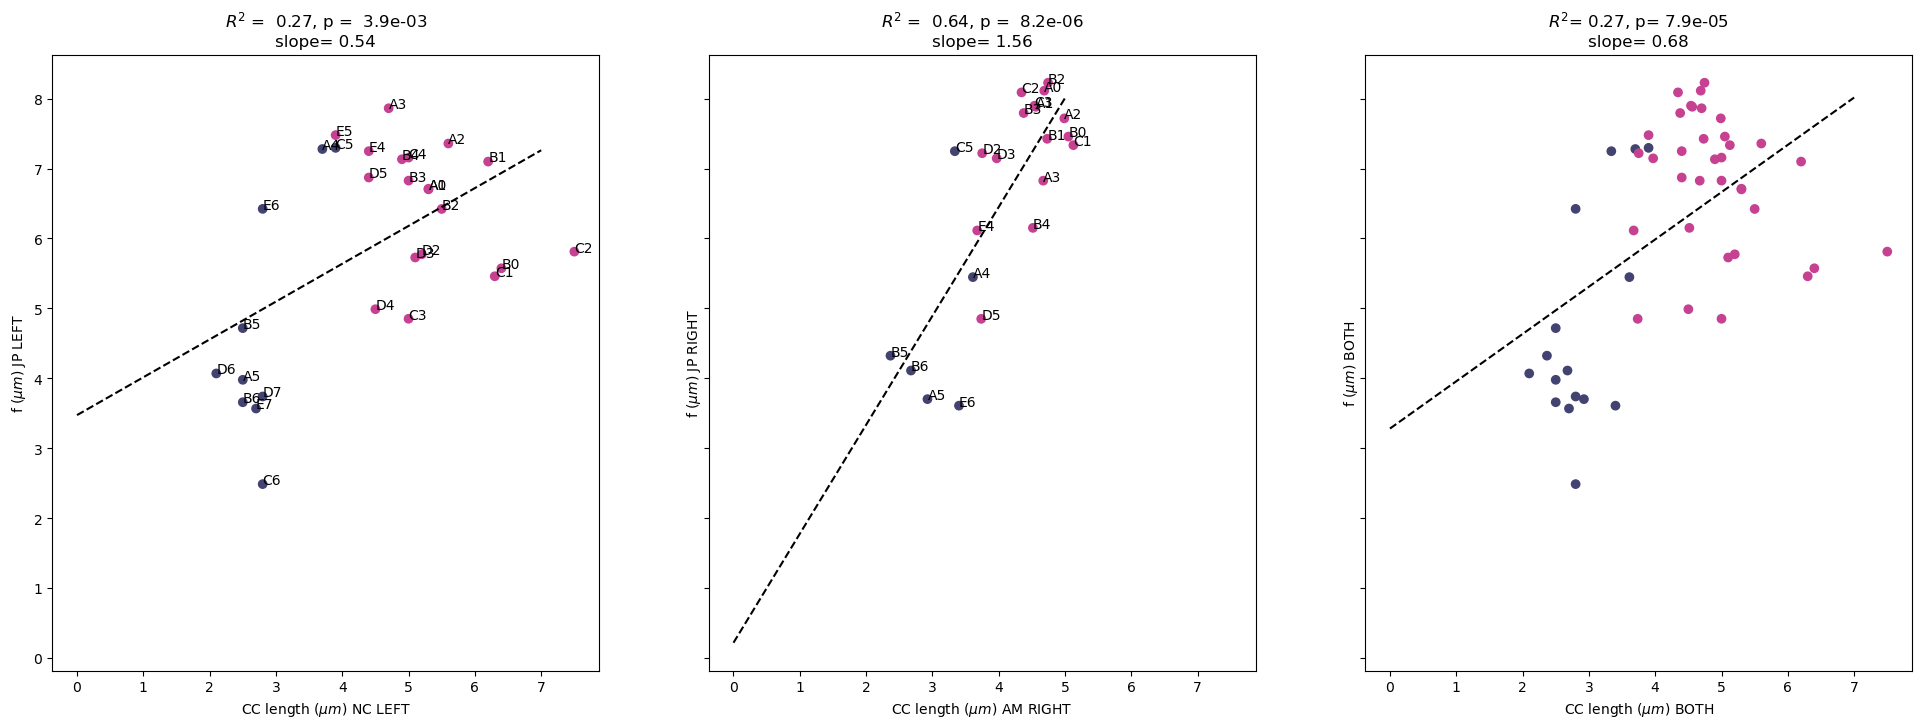

In [45]:
fig, ax = plt.subplots(1, 3, figsize=[24, 8], sharex=True, sharey=True)
# ~~~~~~~~~~ LEFT ~~~~~~~~~~~~
f_L = []
d_L = []
group_c = om_colors(jp_left.index)
for om, row in jp_left.iterrows():  # replace with am_df to include C6
    this_f = f_thick(row['radii_out'], row['radii_in'], row['lens_thickness'])
    f_L.append(this_f)
    d_L.append(cc_left[om])
    ax[0].annotate(om, (cc_left[om], this_f))
    
_x = d_L
X = sm.add_constant(_x)
Y = f_L

model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())

ax[0].scatter(x=_x, y=Y, marker='o', c=group_c)
ax[0].set_title(f'$R^{2}$ = {results.rsquared: .2f}, p = {results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[0].set_xlabel('CC length ($\mu{m}$) NC LEFT')
ax[0].set_ylabel("f ($\mu{m}$) JP LEFT")

xx = np.arange(0, max(_x))
ax[0].plot(xx, params[1] * xx + params[0], c='k', ls='--')


# ~~~~~~~~~~ RIGHT ~~~~~~~~~~~~
f_R = []
d_R = []
group_c = om_colors(am_right.index)
for om, row in am_right.iterrows():  # replace with am_df to include C6
    this_f = f_thick(jp_right.loc[om, 'radii_out'], jp_right.loc[om, 'radii_in'], jp_right.loc[om, 'lens_thickness'])
    f_R.append(this_f)
    d_R.append(row['cone length (from the tip)'])
    ax[1].annotate(om, (row['cone length (from the tip)'], this_f))
    
_x = d_R
X = sm.add_constant(_x)
Y = f_R

model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())

ax[1].scatter(x=_x, y=Y, marker='o', c=group_c)
ax[1].set_title(f'$R^{2}$ = {results.rsquared: .2f}, p = {results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[1].set_xlabel('CC length ($\mu{m}$) AM RIGHT')
ax[1].set_ylabel("f ($\mu{m}$) JP RIGHT")

xx = np.arange(0, max(_x))
ax[1].plot(xx, params[1] * xx + params[0], c='k', ls='--')

# ~~~~~~~~~~ JP LEFT ~~~~~~~~~~~~
f_both = [*f_L, *f_R]
d_both = [*d_L, *d_R]
group_c = [*om_colors(jp_left.index), *om_colors(jp_right.index)]

_x = d_both
X = sm.add_constant(_x)
Y = f_both

model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())

ax[2].scatter(x=_x, y=Y, marker='o', c=group_c)
#ax[1].annotate(jp_right.index, (_x, Y))
ax[2].set_title(f'$R^{2}$={results.rsquared: .2f}, p={results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[2].set_xlabel('CC length ($\mu{m}$) BOTH')
ax[2].set_ylabel("f ($\mu{m}$) BOTH")

xx = np.arange(0, max(_x))
ax[2].plot(xx, params[1] * xx + params[0], c='k', ls='--')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.250
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     8.978
Date:                Thu, 01 Jul 2021   Prob (F-statistic):            0.00580
Time:                        16:46:14   Log-Likelihood:                -47.484
No. Observations:                  29   AIC:                             98.97
Df Residuals:                      27   BIC:                             101.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2361      0.911      3.550      0.001       1.366       5.106
x1             0.6238      0.208      2.996      0.006       0.197       1.051
==============================================================================
Omnibus:                        1.855   Durbin-Watson:                   1.840
Prob(Omnibus):                  0.395   Jarque-Bera (JB):                1.085
Skew:                          -0.001   Prob(JB):                        0.581
Kurtosis:                       2.052   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     35.33
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           8.19e-06
Time:                        16:46:14   Log-Likelihood:                -29.013
No. Observations:                  22   AIC:                             62.03
Df Residuals:                      20   BIC:                             64.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179      1.089      0.200      0.843      -2.053       2.489
x1             1.5581      0.262      5.944      0.000       1.011       2.105
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.429
Skew:                          -0.107   Prob(JB):                        0.807
Kurtosis:                       2.351   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     21.98
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           2.23e-05
Time:                        16:46:14   Log-Likelihood:                -83.838
No. Observations:                  51   AIC:                             171.7
Df Residuals:                      49   BIC:                             175.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.7087      0.761      3.560      0.001       1.180       4.238
x1             0.8328      0.178      4.688      0.000       0.476       1.190
==============================================================================
Omnibus:                        5.971   Durbin-Watson:                   1.515
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                2.481
Skew:                          -0.199   Prob(JB):                        0.289
Kurtosis:                       1.996   Cond. No.                         19.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

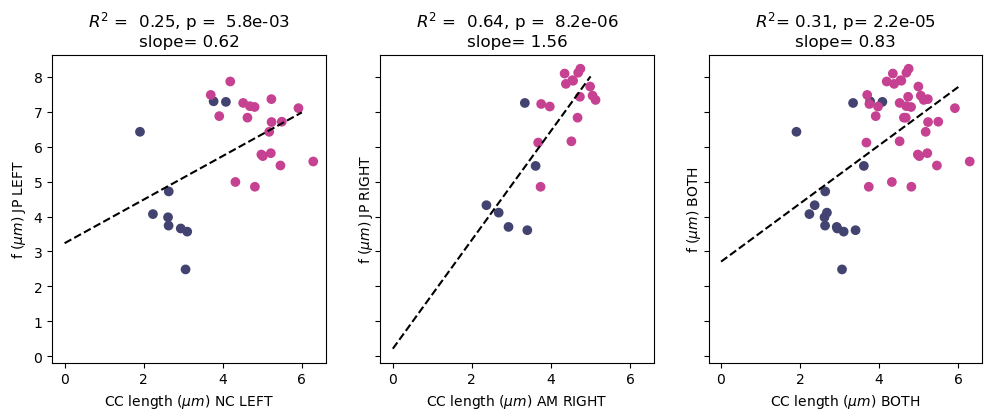

In [43]:
fig, ax = plt.subplots(1, 3, figsize=[12, 4], sharex=True, sharey=True)
# ~~~~~~~~~~ LEFT ~~~~~~~~~~~~
f_L = []
d_L = []
group_c = om_colors(jp_left.index)
for om, row in jp_left.iterrows():  # replace with am_df to include C6
    this_f = f_thick(row['radii_out'], row['radii_in'], row['lens_thickness'])
    f_L.append(this_f)
    d_L.append(row['distances'])
    #ax[0].annotate(om, (cc_left[om], this_f))
    
_x = d_L
X = sm.add_constant(_x)
Y = f_L

model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())

ax[0].scatter(x=_x, y=Y, marker='o', c=group_c)
ax[0].set_title(f'$R^{2}$ = {results.rsquared: .2f}, p = {results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[0].set_xlabel('CC length ($\mu{m}$) NC LEFT')
ax[0].set_ylabel("f ($\mu{m}$) JP LEFT")

xx = np.arange(0, max(_x))
ax[0].plot(xx, params[1] * xx + params[0], c='k', ls='--')


# ~~~~~~~~~~ RIGHT ~~~~~~~~~~~~
f_R = []
d_R = []
group_c = om_colors(am_right.index)
for om, row in am_right.iterrows():  # replace with am_df to include C6
    this_f = f_thick(jp_right.loc[om, 'radii_out'], jp_right.loc[om, 'radii_in'], jp_right.loc[om, 'lens_thickness'])
    f_R.append(this_f)
    d_R.append(row['cone length (from the tip)'])
    #ax[1].annotate(om, (row['cone length (from the tip)'], this_f))
    
_x = d_R
X = sm.add_constant(_x)
Y = f_R

model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())

ax[1].scatter(x=_x, y=Y, marker='o', c=group_c)
ax[1].set_title(f'$R^{2}$ = {results.rsquared: .2f}, p = {results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[1].set_xlabel('CC length ($\mu{m}$) AM RIGHT')
ax[1].set_ylabel("f ($\mu{m}$) JP RIGHT")

xx = np.arange(0, max(_x))
ax[1].plot(xx, params[1] * xx + params[0], c='k', ls='--')

# ~~~~~~~~~~ JP LEFT ~~~~~~~~~~~~
f_both = [*f_L, *f_R]
d_both = [*d_L, *d_R]
group_c = [*om_colors(jp_left.index), *om_colors(jp_right.index)]

_x = d_both
X = sm.add_constant(_x)
Y = f_both

model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())

ax[2].scatter(x=_x, y=Y, marker='o', c=group_c)
#ax[1].annotate(jp_right.index, (_x, Y))
ax[2].set_title(f'$R^{2}$={results.rsquared: .2f}, p={results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[2].set_xlabel('CC length ($\mu{m}$) BOTH')
ax[2].set_ylabel("f ($\mu{m}$) BOTH")

xx = np.arange(0, max(_x))
ax[2].plot(xx, params[1] * xx + params[0], c='k', ls='--')


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                     13.53
Date:                Thu, 01 Jul 2021   Prob (F-statistic):            0.00149
Time:                        16:33:04   Log-Likelihood:                -41.657
No. Observations:                  22   AIC:                             87.31
Df Residuals:                      20   BIC:                             89.50
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1509      1.934      3.697      0.001       3.116      11.186
x1             1.7128      0.466      3.678      0.001       0.741       2.684
==============================================================================
Omnibus:                        0.682   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.711   Jarque-Bera (JB):                0.103
Skew:                           0.153   Prob(JB):                        0.950
Kurtosis:                       3.137   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[7.15091925 1.71278566]


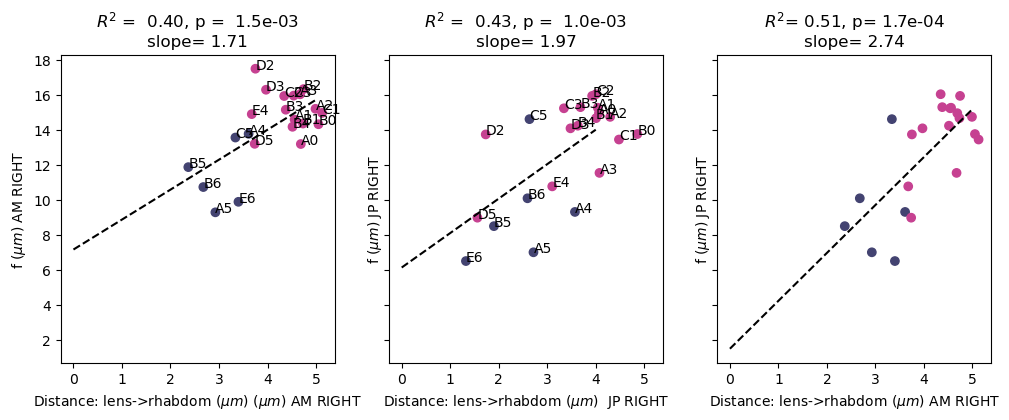

In [36]:


fig, ax = plt.subplots(1, 3, figsize=[12, 4], sharex=True, sharey=True)

n = 1.452 # Refraction index of Apis lens 
f_thin = lambda r_outer: r_outer * n / (n-1)

# THICK LENS #

# ~~~~~~~~~~ AM RIGHT ~~~~~~~~~~~~
f = []
d = []
group_c = om_colors(am_right.index)
for om, row in am_right.iterrows():  # replace with am_df to include C6
    f.append(f_thin(row['outer curvature']))
    d.append(row['cone length (from the tip)'])
    ax[0].annotate(om, (row['cone length (from the tip)'], f_thin(row['outer curvature'])))
_x = d
X = sm.add_constant(_x)
Y = f

model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())
print(params)

ax[0].scatter(x=_x, y=Y, marker='o', c=group_c)
ax[0].set_title(f'$R^{2}$ = {results.rsquared: .2f}, p = {results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[0].set_xlabel('Distance: lens->rhabdom ($\mu{m}$) ($\mu{m}$) AM RIGHT')
ax[0].set_ylabel("f ($\mu{m}$) AM RIGHT")

xx = np.arange(0, max(_x))
ax[0].plot(xx, params[1] * xx + params[0], c='k', ls='--')

# ~~~~~~~~~~ JP RIGHT ~~~~~~~~~~~~
f = []
d = []
group_c = om_colors(jp_right.index)
for om, row in jp_right.iterrows():  # replace with am_df to include C6
    f.append(f_thin(row['radii_out']))
    d.append(row['distances'])
    ax[1].annotate(om, (row['distances'], f_thin(row['radii_out'])))
_x = d
X = sm.add_constant(_x)
Y = f

model = sm.OLS(Y, X)
results = model.fit()
params = results.params

ax[1].scatter(x=_x, y=Y, marker='o', c=group_c)
#ax[1].annotate(jp_right.index, (_x, Y))
ax[1].set_title(f'$R^{2}$ = {results.rsquared: .2f}, p = {results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[1].set_xlabel('Distance: lens->rhabdom ($\mu{m}$)  JP RIGHT')
ax[1].set_ylabel("f ($\mu{m}$) JP RIGHT")

xx = np.arange(0, max(_x))
ax[1].plot(xx, params[1] * xx + params[0], c='k', ls='--')

# ~~~~~~~~~~ JP LEFT ~~~~~~~~~~~~
f = []
d = []
group_c = om_colors(jp_right.index)
for om, row in jp_right.iterrows():  # replace with am_df to include C6
    f.append(f_thin(row['radii_out']))
for om, row in am_right.iterrows():
    d.append(row['cone length (from the tip)'])
    #ax[2].annotate(om, (row['distances'], f_thin(row['radii_out'])))
_x = d
X = sm.add_constant(_x)
Y = f

model = sm.OLS(Y, X)
results = model.fit()
params = results.params

ax[2].scatter(x=_x, y=Y, marker='o', c=group_c)
#ax[1].annotate(jp_right.index, (_x, Y))
ax[2].set_title(f'$R^{2}$={results.rsquared: .2f}, p={results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax[2].set_xlabel('Distance: lens->rhabdom ($\mu{m}$) AM RIGHT')
ax[2].set_ylabel("f ($\mu{m}$) JP RIGHT")

xx = np.arange(0, max(_x))
ax[2].plot(xx, params[1] * xx + params[0], c='k', ls='--')


Text(0, 0.5, 'f (thick eq) JP RIGHT')

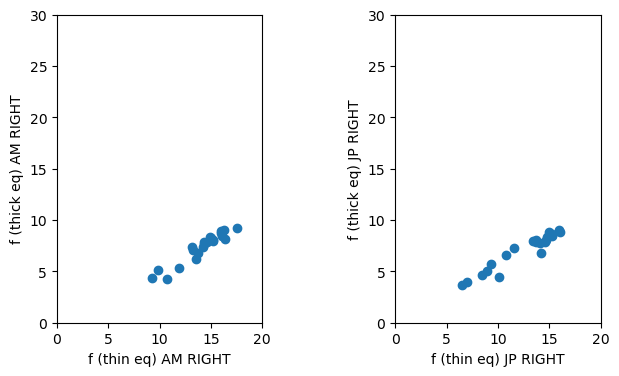

In [27]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4],)

x = f_thin(am_right['outer curvature'])
y = [f_thick(o, i, t) for o, i, t in zip(am_right['outer curvature'], am_right['inner curvature'], am_right['lense thickness'])]
labels = [str(i) for i in am_right.index]

ax[0].scatter(x, y)
#ax[0].annotate(labels, (x, y))

ax[0].set_aspect('equal')
ax[0].set_xlim([0, 20])
ax[0].set_ylim([0, 30])
ax[0].set_xlabel('f (thin eq) AM RIGHT')
ax[0].set_ylabel('f (thick eq) AM RIGHT')


x = f_thin(jp_right['radii_out'])
y = [f_thick(o, i, t) for o, i, t in zip(jp_right['radii_out'], jp_right['radii_in'], jp_right['lens_thickness'])]
labels = [str(i) for i in jp_right.index]

ax[1].scatter(x, y)
#ax[1].annotate(labels, (x, y))

ax[1].set_aspect('equal')
ax[1].set_xlim([0, 20])
ax[1].set_ylim([0, 30])
ax[1].set_xlabel('f (thin eq) JP RIGHT')
ax[1].set_ylabel('f (thick eq) JP RIGHT')

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     35.33
Date:                Thu, 01 Jul 2021   Prob (F-statistic):           8.19e-06
Time:                        16:36:28   Log-Likelihood:                -29.013
No. Observations:                  22   AIC:                             62.03
Df Residuals:                      20   BIC:                             64.21
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2179      1.089      0.200      0.843      -2.053       2.489
x1             1.5581      0.262      5.944      0.000       1.011       2.105
==============================================================================
Omnibus:                        0.236   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.889   Jarque-Bera (JB):                0.429
Skew:                          -0.107   Prob(JB):                        0.807
Kurtosis:                       2.351   Cond. No.                         23.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

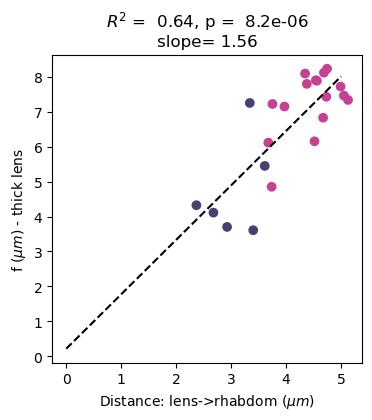

In [37]:
fig, ax = plt.subplots(1, figsize=[4, 4], sharex=True, sharey=True)

f = [f_thick(o, i, t) for o, i, t in zip(jp_right['radii_out'], jp_right['radii_in'], jp_right['lens_thickness'])]
d = [am_right.loc[om, 'cone length (from the tip)'] for om in jp_right.index]
region_c = om_colors(jp_right.index)
region_m = om_markers(jp_right.index)

_x = d
X = sm.add_constant(_x)
Y = f

# REGRESSION
model = sm.OLS(Y, X)
results = model.fit()
params = results.params
display(results.summary())

ax.scatter(x=_x, y=Y, color=region_c)
ax.set_title(f'$R^{2}$ = {results.rsquared: .2f}, p = {results.f_pvalue: .1e}\n' +
                f'slope={params[1]: .2f}')
ax.set_xlabel('Distance: lens->rhabdom ($\mu{m}$)')
ax.set_ylabel("f ($\mu{m}$) - thick lens")

xx = np.arange(0, max(_x))
ax.plot(xx, params[1] * xx + params[0], c='k', ls='--')